In [3]:
# Importation des packaques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from math import ceil,floor
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import RidgeCV,ElasticNetCV,Lasso,LassoCV
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error as mae

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn import model_selection
import re

In [4]:
# Importation du fichier de scraping
df = pd.read_csv('vgsales.csv')
df=df.fillna(0)

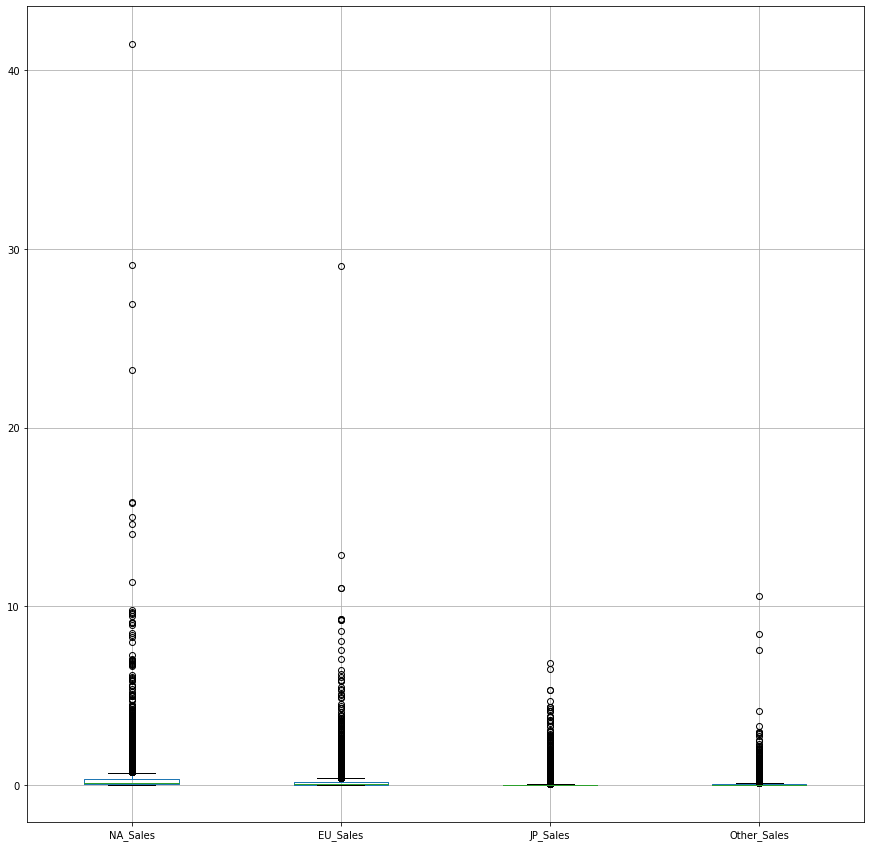

In [3]:
df.boxplot(column=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],figsize= (15,15));

In [5]:
# Suppression des outliers
df.drop(df.loc[df['NA_Sales']>6].index, inplace=True)
df.drop(df.loc[df['JP_Sales']>3].index, inplace=True)
df.drop(df.loc[df['EU_Sales']>4].index, inplace=True)
df.drop(df.loc[df['EU_Sales']==0].index, inplace=True)
df.drop(df.loc[df['Other_Sales']>2].index, inplace=True)


In [6]:
#Suppression des lignes ou l'ensemble des ventes hors Japon sont à 0
indexNames = df[((df['NA_Sales']==0) & (df['EU_Sales']==0) & (df['Other_Sales']==0))].index
df.drop(indexNames , inplace=True)


In [7]:
# Création d'un indicateur donnant un poids numérique à la série
tabserie=pd.DataFrame(df.groupby('serie')['serie'].count())
def categorize_serie(df):
    if(df['serie']==0):
        return 0
    else:
        return tabserie['serie'][df['serie']]
df['serie']=df['serie'].fillna(0)
df['SerieWeight']=df.apply(categorize_serie,axis=1)

In [8]:
df.drop(['Rank','serie','Name','gamename','samename','metaNoteQ','Global_Sales','JP_Sales'], axis=1, inplace=True)

In [9]:
df

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Other_Sales,developper,metaNote,metaNbVote,userNote,userNbVote,serieB,SerieWeight
33,3DS,2011.0,Racing,Nintendo,4.74,3.91,0.89,Entertainment Analysis & Development Division,85.0,73.0,8.2,861.0,1,3
41,PS,1997.0,Racing,Sony Computer Entertainment,4.02,3.87,0.52,Polyphony Digital,75.0,83.0,6.1,1705.0,0,0
43,PS3,2009.0,Shooter,Activision,4.99,3.69,1.63,Infinity Ward,94.0,100.0,0.0,0.0,0,0
44,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,1.62,Rockstar North,98.0,64.0,7.7,4189.0,1,14
45,DS,2004.0,Platform,Nintendo,5.08,3.11,0.98,Nintendo,94.0,13.0,9.1,1450.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11518,PC,2007.0,Sports,Konami Digital Entertainment,0.00,0.01,0.00,Konami,76.0,29.0,7.5,42.0,1,46
11522,PSV,2015.0,Platform,Rain Games,0.00,0.01,0.00,Rain Games,81.0,8.0,8.0,22.0,0,0
11525,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,Wicked Witch Software,64.0,4.0,6.1,15.0,1,4
11526,PC,2009.0,Shooter,Codemasters,0.00,0.01,0.00,Blue Omega,36.0,36.0,3.1,49.0,0,0


In [12]:
df = pd.get_dummies(df)
target = df['EU_Sales']
data = df.drop(['EU_Sales'], axis=1, inplace=False)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=66)

In [14]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Test du modèle de Régression Linéaire

lr = LinearRegression()
lr.fit(X_train, y_train)

print("Train score :", lr.score(X_train_scaled,y_train))
print("Test score :",lr.score(X_test_scaled,y_test))

y_pred = lr.predict(X_test)
print("MAE : ",mae(y_test, y_pred))

Train score : -8182000236726531.0
Test score : -7.021668159327496e+16
MAE :  227826.7261039437


TEST METHODE RIDGE

In [11]:
#Données brutes
ridge_reg = RidgeCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
print('mae:',mae(y_test, y_pred))

mae: 0.09244415139006187


In [12]:
#Données recalibrées
ridge_reg.fit(X_train_scaled, y_train)
y_pred = ridge_reg.predict(X_test_scaled)
print('mae:',mae(y_test, y_pred))

mae: 0.10021362119648468


TEST METHODE LASSO

In [13]:
lasso_r = Lasso()


In [14]:
#Données brutes
lasso_r.fit(X_train, y_train)
y_pred = lasso_r.predict(X_test)
print('mae:',mae(y_test, y_pred))

mae: 0.1927026641489446


In [15]:
#Données recalibrées
lasso_r.fit(X_train_scaled, y_train)
y_pred = lasso_r.predict(X_test_scaled)
print('mae:',mae(y_test, y_pred))

mae: 0.20528286801456821


Methode LASSO CV

In [16]:
model_lasso = LassoCV(cv=10).fit(X_train, y_train)
y_pred = model_lasso.predict(X_test)
print('mae:',mae(y_test, y_pred))

mae: 0.20258082262274632


In [15]:
model_lasso = LassoCV(cv=10).fit(X_train_scaled, y_train)
y_pred = model_lasso.predict(X_test_scaled)
print('mae:',mae(y_test, y_pred))

mae: 0.08469666621957281


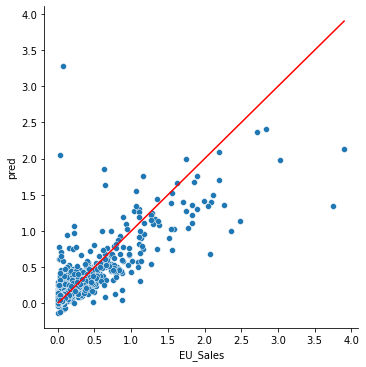

In [18]:
dfresult = pd.DataFrame(y_test)
dfresult['pred']=y_pred
sns.relplot(x='EU_Sales', y='pred', data=dfresult);
sns.lineplot(x='EU_Sales', y='EU_Sales', data=dfresult,color="red");

METHODE ELASTIC NET

In [19]:
model_en = ElasticNetCV(cv=8, l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99), 
                        alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0))

In [20]:
#Données brutes
model_en.fit(X_train, y_train)
y_pred = model_en.predict(X_test)
print('mae:',mae(y_test, y_pred))

mae: 0.08988219984155874


In [21]:
#Données recalibrées
model_en.fit(X_train_scaled, y_train)
y_pred = model_en.predict(X_test_scaled)
print('mae:',mae(y_test, y_pred))

mae: 0.08479548829455555


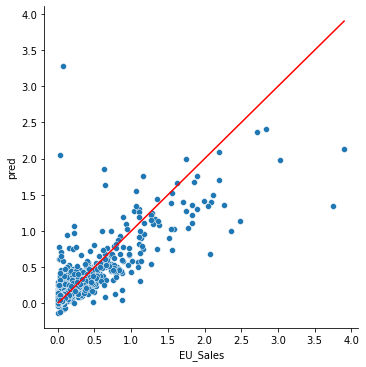

In [19]:
dfresult = pd.DataFrame(y_test)
dfresult['pred']=y_pred
sns.relplot(x='EU_Sales', y='pred', data=dfresult);
sns.lineplot(x='EU_Sales', y='EU_Sales', data=dfresult,color="red");



In [23]:
dfresult

,EU_Sales,pred
1476,0.03,0.159094
8556,0.01,0.007936
1620,0.40,0.334324
11298,0.01,0.053475
10726,0.02,0.048909
...,...,...
9997,0.03,0.118351
6691,0.06,0.040600
1307,0.26,0.298992
2367,0.24,0.166183
